<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 0 - Libraries</p>

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 175%; text-align: center; border-radius: 10px 10px;">0.1 - Preprocessing</p>

In [1]:
import numpy as np
import math
import pandas as pd

from sklearn.preprocessing import StandardScaler

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 175%; text-align: center; border-radius: 10px 10px;">0.2 - Plotting</p>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 175%; text-align: center; border-radius: 10px 10px;">0.3 - Clustering</p>

In [3]:
from scipy.cluster import hierarchy
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 175%; text-align: center; border-radius: 10px 10px;">0.4 - PCA</p>

In [4]:
from pca import pca as PCA2
from sklearn.decomposition import PCA as PCA1

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 1 - Story</p>

Instacart allows online shopping, serving verticals including beauty, electronics, groceries, and pets, at the convenience of your home, delivered to your doorstep. Order placement is enabled via the app or website, routed to personal shoppers, for review, pick-up, and delivery, covering over 1,100 retail banners across more than 5,500 cities. The data science team, thereby, contributes significantly to the user experience of the app or website.

I contribute to user engagement via predictive marketing as part of my role. Therefore, I am developing models to provide personalized recommendations or promotions to users based on their ordering behavior across a broad range of product categories. In the current project, this is to be approached via clustering, an unsupervised machine learning technique.

As an experiment within the larger project, the k-means++ and the agglomerative hierarchical algorithm are to be applied both prior to and after PCA analysis. The resultant models aim at the extraction of user segments as well as differences in their behavior. By understanding the demands of user segments, the aforementioned personalized recommendations and promotions may be inferred, whereby the added value for Instacart is higher engagement, leading to higher revenue.

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 2 - The Data</p>

The following chapter describes the <em>__[datasets](https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis)__</em> subject to the experiments. More specifically, it will be outlined as to what it consists of and how it fits within the context of the experiments. In the event that the <em>__[dataset](https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis)__</em> appears to be valid according to that outline, it will be read.

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 175%; text-align: center; border-radius: 10px 10px;">2.1 - Features</p>

Throughout this section, <em>__[datasets](https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis)__</em> are detailed by delineating their features.

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">2.1.1 - products.csv</p>

<center>

| Feature | Description |
| :----: | :----: |
| product_id | unique identifier of product |
| product_name | name of product |
| aisle_id | unique identifier of aisle |
| department_id | unique identifier of department |

<b>definition (product)</b>: good to be sold embodied as grocery

<b>context</b>: product/s delivered to user by personal shopper, ordered via Instacart app or website

</center>

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">2.1.2 - orders.csv</p>

<center>

| Feature | Description |
| :----: | :----: |
| order_id | unique identifier of order |
| user_id | unique identifier of user |
| eval_set | name of partition (prior, train, test) |
| order_number | quantity of orders placed by same user |
| order_dow | weekday of order (0 to 6 starting on Sunday)|
| order_hour_of_day | hour of order (0 to 23) |
| days_since_prior_order | interval between two orders placed by same user |

<b>definition (order)</b>: concurrence between user and Instacart on delivery of product/s

<b>context</b>: single or multitude of product/s, delivered as single unit to user by personal shopper

</center>

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">2.1.3 - order_products__prior.csv</p>

<center>

| Feature | Description |
| :----: | :----: |
| order_id | unique identifier of order |
| product_id | unique identifier of product |
| add_to_cart_order | consecutive quantity of products added to an order |
| reordered | binary expression of whether a product added to an order has been ordered previously by same user |

<b>definition (product & order)</b>: <em>see products.csv (2.1.1) & orders.csv (2.1.2)</em>

<b>context</b>: <em>see products.csv (2.1.1) & orders.csv (2.1.2)</em>

</center>

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">2.1.4 - aisles.csv</p>

<center>

| Feature | Description |
| :----: | :----: |
| aisle_id | unique identifier of aisle |
| aisle | name of aisle |

<b>definition (aisle)</b>: long, narrow space between the rows of shelves in store, accomodating related products

<b>context</b>: categoric space in which a product contained within an order placed by a user is to be found in-store

</center>

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">2.1.5 - departments.csv</p>

<center>

| Feature | Description |
| :----: | :----: |
| department_id | unique identifier of department |
| department | name of department |

<b>definition (department)</b>: space in store, accomodating related aisles

<b>context</b>: categoric space in which a product contained within an order placed by a user is to be found in-store

</center>


<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 175%; text-align: center; border-radius: 10px 10px;">2.2 - Experiment Context</p>

The <em>__[datasets](https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis)__</em> provide transactional data pertaining to the grocery vertical. These disparate <em>__[datasets](https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis)__</em> reflect collectively when merged, products within orders placed by users as well as their behavior. Features define thereby users' behavior, whereas instances represent products ordered by them.

In the experiments, users are to be segmented according to their order behavior. Order behavior will be explored in terms of the product compositions contained in orders placed by users. As the experiments cover a wide range of product categories, reasonable clustering dimensionality is maintained by abstraction. Such abstraction of a product can be found in the feature "department_name". A mapping between those departments and users is enabled by "user_id", suggesting the usage of the presented datasets.

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 175%; text-align: center; border-radius: 10px 10px;">2.3 - Loading Datasets</p>

In [5]:
datasets = []
file_names = ["aisles.csv",
              "departments.csv", 
              "order_products__prior.csv",
              "orders.csv",
              "products.csv"]

for i in file_names:
    file = pd.read_csv(f"dataset/{i}")
    datasets.append(file)

In this cell, disparate <em>__[datasets](https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis)__</em> relevant to the experiments are read and stored within a single list "datasets".

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 3 Part 1 - IDA</p>

It is within this section that the individual disparate <em>__[datasets](https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis)__</em> are listed with their respective features, in order to make sense of the merging operations performed later on to generate the experiment's collective <em>__[dataset](https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis)__</em>.

In [6]:
for i in range(0, len(datasets)):
    len_feature = len(max(datasets[i].columns, key = len)) + 2
    len_title = 17 + len_feature
    len_line = len_title + 2

    print(f"-" * (len_line))
    print(f"|{file_names[i]:^{len_title}}|")
    print(f"-" * (len_line))
    
    print(f"|{'Feature Number':^16}|{'Feature':^{len_feature}}|")
    print(f"-" * (len_line))
    for j in range(0, len(datasets[i].columns)):
        print(f"|{j:^16}|{datasets[i].columns[j]:^{len_feature}}|")
    print(f"\n\n")

-----------------------------
|        aisles.csv         |
-----------------------------
| Feature Number | Feature  |
-----------------------------
|       0        | aisle_id |
|       1        |  aisle   |



----------------------------------
|        departments.csv         |
----------------------------------
| Feature Number |    Feature    |
----------------------------------
|       0        | department_id |
|       1        |  department   |



--------------------------------------
|     order_products__prior.csv      |
--------------------------------------
| Feature Number |      Feature      |
--------------------------------------
|       0        |     order_id      |
|       1        |    product_id     |
|       2        | add_to_cart_order |
|       3        |     reordered     |



-------------------------------------------
|               orders.csv                |
-------------------------------------------
| Feature Number |        Feature         |
---------

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 4 Part 1 - EDA, Preprocessing</p>

In the following, prior to further initial data analysis, the aforementioned collective <em>__[dataset](https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis)__</em> for the subsequent experiments is generated. By doing so, we ensure that the initial data analysis includes all relevant instances while avoiding redundant outputs within analysis.

In [7]:
df_d = pd.merge(left = datasets[1], 
                right = datasets[4], 
                how = "right", 
                on = "department_id")

The <em>__[datasets](https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis)__</em> of type dimension contained within the list "datasets" are merged within this cell and stored in the DataFrame "df_d". In this instance, a right join is applied on the single common merge key "department_id". Right join, as only departments affiliated with Instacart products should be considered. A justification for the merge and the associated consideration of the "product.csv" is based on the absence of matching merge keys between the fact datasets and the "department.csv".

In [8]:
df_f = pd.merge(left = datasets[2], 
                right = datasets[3], 
                how = "outer", 
                on = "order_id")

By means of this cell, fact <em>__[datasets](https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis)__</em> are merged based on the single common merge key "order_id" and stored in a DataFrame as "df_f". The outer join is applied given the type of table, in which all instances are relevant, presupposing complete inclusion. As such, "order_products__prior.csv" provides relevant instances pertaining to products within orders placed on which later departments are based as well as "order.csv" regarding the users associated with these orders, enabling later mappings.

In [9]:
df = pd.merge(left = df_f, 
              right = df_d, 
              how = "left", 
              on = "product_id")

The DataFrames "df_f" and "df_d" are merged based upon the single common merge key "product_id" as part of this cell and stored in "df" as a DataFrame. As "df_d" is by nature of type dimension, providing metadata regarding departments, the omission of instances not present within the fact table is suggested and thus a left join. The resulting DataFrame includes the behavioral parameter "department_name", along with "user_id", allowing mapping to the users.

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 3 Part 2 - IDA</p>

This section provides a high-level understanding of the DataFrame to be experimented with, i.e. an overview, is obtained, necessary for informed decisions on how to proceed with preprocessing.

In [10]:
def initial_data_analysis(df):
    display(df.head(8))

    print(f"\n\n|{'Instances':^11}|{'Features':^10}|")
    print(f"-" * 24)
    print(f"|{df.shape[0]:^11}|{df.shape[1]:^10}|")

    print(f"\n\n|{'Feature Number':^16}|{'Feature Identifier':^24}|{'Not a Number':^14}|{'Data Type':^11}|")
    print(f"-" * 70)
    for i in range(0, len(df.columns)):
        print(f"|{i:^16}|{df.columns[i]:^24}|{df[df.columns[i]].isna().sum(axis = 0):^14}|{str(df.dtypes[i]):^11}|")

    return

In [11]:
initial_data_analysis(df)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department_id,department,product_name,aisle_id
0,2,33120.0,1.0,1.0,202279,prior,3,5,9,8.0,16.0,dairy eggs,Organic Egg Whites,86.0
1,2,28985.0,2.0,1.0,202279,prior,3,5,9,8.0,4.0,produce,Michigan Organic Kale,83.0
2,2,9327.0,3.0,0.0,202279,prior,3,5,9,8.0,13.0,pantry,Garlic Powder,104.0
3,2,45918.0,4.0,1.0,202279,prior,3,5,9,8.0,13.0,pantry,Coconut Butter,19.0
4,2,30035.0,5.0,0.0,202279,prior,3,5,9,8.0,13.0,pantry,Natural Sweetener,17.0
5,2,17794.0,6.0,1.0,202279,prior,3,5,9,8.0,4.0,produce,Carrots,83.0
6,2,40141.0,7.0,1.0,202279,prior,3,5,9,8.0,13.0,pantry,Original Unflavored Gelatine Mix,105.0
7,2,1819.0,8.0,1.0,202279,prior,3,5,9,8.0,13.0,pantry,All Natural No Stir Creamy Almond Butter,88.0




| Instances | Features |
------------------------
| 32640698  |    14    |


| Feature Number |   Feature Identifier   | Not a Number | Data Type |
----------------------------------------------------------------------
|       0        |        order_id        |      0       |   int64   |


|       1        |       product_id       |    206209    |  float64  |
|       2        |   add_to_cart_order    |    206209    |  float64  |
|       3        |       reordered        |    206209    |  float64  |
|       4        |        user_id         |      0       |   int64   |
|       5        |        eval_set        |      0       |  object   |
|       6        |      order_number      |      0       |   int64   |
|       7        |       order_dow        |      0       |   int64   |
|       8        |   order_hour_of_day    |      0       |   int64   |
|       9        | days_since_prior_order |   2078068    |  float64  |
|       10       |     department_id      |    206209    |  float64  |
|       11       |       department       |    206209    |  object   |
|       12       |      product_name      |    206209    |  object   |
|       13       |        aisle_id        |    206209    |  float64  |


Initial data analysis shows that 32,640,698 instances were observed. Those instances contain 206,209 "NaN" data points for the features "product_id", "add_to_cart_order", "reordered", "department_id", "department", "product_name", and "aisle_id", as well as 2,078,068 "NaN" data points for "days_since_prior_order". Feature data types within that <em>__[dataset](https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis)__</em> exhibit largely meaningful data typing. Widely, as numeric data types are correctly assigned, yet as "float" although "integer" would suffice.

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 4 Part 2 - EDA, Preprocessing</p>

The purpose of this section is to prepare the DataFrame for the final stage of initial data analysis. Therefore the DataFrame is truncated to a manageable sample, in order to avoid excessively long algorithm run times. In order to prevent the loss of parts of an instance during truncation, it is necessary to arrange the DataFrame in such a manner that each instance represents an order, rather than a product contained within an order. Each instance must be meaningful within the sample, wherefore relevant "NaN" data points are addressed. For the initial data analysis, i.e. the statistical overview in the final step, to be representative, it should be based on the sample used during experiments, giving preprocessing priority.

In [12]:
dspo = "days_since_prior_order"

unique_days = df[dspo].unique()
unique_days.sort()
display(unique_days)

df[dspo] = df[dspo].fillna(-1)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., nan])

The purpose of this cell is to fill the "NaN" data points within the feature "days_since_prior_order". Accordingly, first, assigned unique data points are returned in order. Data points obtained range from zero to 30. As "NaN" data points represent the first order placed by a user, the yet unassigned -1 is chosen as a substitute.

In [13]:
instance_NaN = df[df.isnull().any(axis = 1)]
total_NaN = df.isnull().sum().sum()
feature_number = df.isnull().any().sum()

if instance_NaN.shape[0] == (total_NaN / feature_number):
    print(f"Missing data points appear respectively in the same instance.")
else:
    print(f"Missing data points do not appear respectively in the same instance.")

display(instance_NaN["eval_set"].unique())


partition_size_train_test = df[(df.eval_set != "prior")].shape[0]

if instance_NaN.shape[0] == partition_size_train_test:
    print(f"Each partition entry is affected by 'NaN' data points")
else:
    print(f"Not every partition entry is affected by 'NaN' data points")

Missing data points appear respectively in the same instance.


array(['train', 'test'], dtype=object)

Each partition entry is affected by 'NaN' data points


By means of this cell, the distribution of relevant "NaN" data points is verified. The remaining "NaN" data points were found to fall in the same instances. Affected instances include only those with the data points "train" and "test", specified within the feature "eval_set". Among these instances corresponding to the data point "train" or "test", each is affected.

In [14]:
df.dropna(inplace = True)

The data points "train" and "test" are predefined splits for a competition, to be populated by "order_products__train.csv". Instances with the data point "prior" in the feature "eval_set" are excluded from the competition and therefore detached. As a result, all remaining "NaN" data points can be dropped, done within this cell.

In [15]:
df_ana = pd.crosstab(df["user_id"],
                     df["department"])

A DataFrame is created in this cell with "user_id" as the index, allowing for subsequent mapping, along with the behavior parameter "department_name" as features. Accordingly, each order per user is totaled by department, representing the respective data points. Results are stored in the DataFrame "df_ana".

In [16]:
random_state = 1
df_ana_sub = df_ana.sample(n = 5000, 
                           random_state = random_state)

A representative sample is created and stored within "df_ana_sub" to avoid long run times. Out of the 206,209 remaining instances, 5,000 are randomly allocated to the sample, according to random state one. As each instance within "df_ana", represents a separate unit, i.e. a user, detached from the other instances, sampling is permitted.

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 3 Part 3 - IDA</p>

A statistical summary is now produced based on the representative sample "df_ana_sub". Therefore, one can form a sense of the sample upon which experiments are subsequently carried out.

In [17]:
df_ana_sub.describe()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.728200,1.939000,5.700800,12.636400,3.460800,0.160200,5.211000,25.494800,4.956000,4.231600,...,3.506400,1.273400,3.441000,0.327200,0.187600,9.046400,2.103800,0.557200,45.107200,13.958600
std,5.667058,9.661736,11.357794,23.113421,7.765187,1.049741,9.828011,39.773594,10.681951,8.138059,...,8.471311,3.103188,6.763407,1.376125,1.355719,14.233157,5.216519,4.614346,70.498971,27.110239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000,1.000000
50%,0.000000,0.000000,2.000000,5.000000,1.000000,0.000000,2.000000,11.000000,2.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,20.000000,5.000000
75%,0.000000,0.000000,6.000000,14.000000,4.000000,0.000000,6.000000,29.000000,5.000000,5.000000,...,3.000000,1.000000,4.000000,0.000000,0.000000,11.000000,2.000000,0.000000,52.000000,15.000000
max,143.000000,191.000000,160.000000,412.000000,145.000000,26.000000,127.000000,733.000000,239.000000,105.000000,...,177.000000,55.000000,80.000000,30.000000,58.000000,220.000000,98.000000,193.000000,899.000000,411.000000


As viewed from the perspective of descriptive statistics, features appear within non-alarming ranges as analyzed from diverse scopes such as count, mean, standard deviation, minimum, quantiles, and maximum. 

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 4 Part 3 - EDA, Preprocessing</p>

As part of the explanatory data analysis, this section gives an overview of the size ratios for total orders by department.

In [18]:
def bar_department(df):
    df = df.sum().reset_index()
    
    sns.barplot(data = df, 
                x = 0, 
                y = "department",
                color = "#99a3ae");
    plt.title("Order Distribution");
    plt.xlabel("sum of orders in one hundred thousand units");
    x_label_ticks = np.linspace(0, 25, 6).astype(int)
    plt.xticks(x_label_ticks * 10000, 
               x_label_ticks);

    return

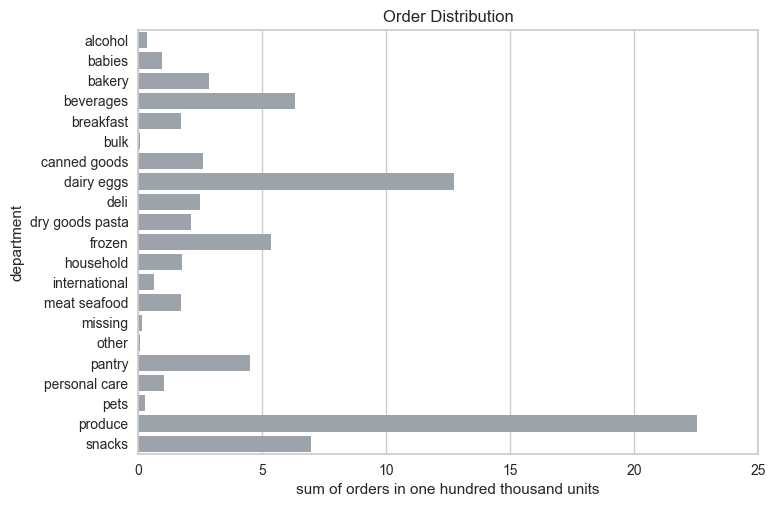

In [19]:
bar_department(df_ana_sub)

Produce accounts for the majority of demand, followed by dairy and eggs, with about two-thirds of it. Behind that the departments, beverages, frozen, pantry, and snacks level out at about one-third of produce. While alcohol, bulk, missing, other, and pets are seldom ordered. All the remaining departments are located in between.

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 5 - Clustering</p>

Clustering algorithms are employed to extract individual user segments in this chapter. These user segments serve as the basis for extracting corresponding behaviors later on.

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 175%; text-align: center; border-radius: 10px 10px;">5.1 - Scaling</p>

Within this cell, the sample DataFrame instances are aligned in scaling by the standard scaler.

In [20]:
sc = StandardScaler()
df_sc = pd.DataFrame(data = sc.fit_transform(df_ana_sub),
                     index = df_ana_sub.index,
                     columns = df_ana_sub.columns)

As to the algorithms to be experimented with, scaling of the features is required. This is due to the fact that the underlying distance measures of the algorithms react sensitively to feature scale.

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 175%; text-align: center; border-radius: 10px 10px;">5.2 - KMeans</p>

In [21]:
def plot_silhouette_coefficients(df_sc, max_clusters = 11):
    silhouettes = []

    for i in range(2, max_clusters):
        kmeans = KMeans(n_clusters = i,
                        init = "k-means++",
                        n_init = 10,
                        random_state = random_state)
        cluster_assignments = kmeans.fit_predict(df_sc)
        silhouettes.append(silhouette_score(df_sc, 
                                            cluster_assignments))
    
    plt.plot(range(2, max_clusters), 
             silhouettes,
             color = "#99a3ae");
    plt.title("Silhouette Coefficient Plot of KMeans Clustering for 5000 Samples");
    plt.xlabel("clusters");
    plt.ylabel("silhouette coefficient values");
    max_silhouette_coefficient = silhouettes[np.argmax(silhouettes)]
    plt.axhline(y = max_silhouette_coefficient, 
                color = "#fe0101",
                linestyle = "--",
                label = np.round(a = max_silhouette_coefficient,
                                 decimals = 2));
    plt.legend(title = "Average Silhouette Score",
               loc = "center right");

    return

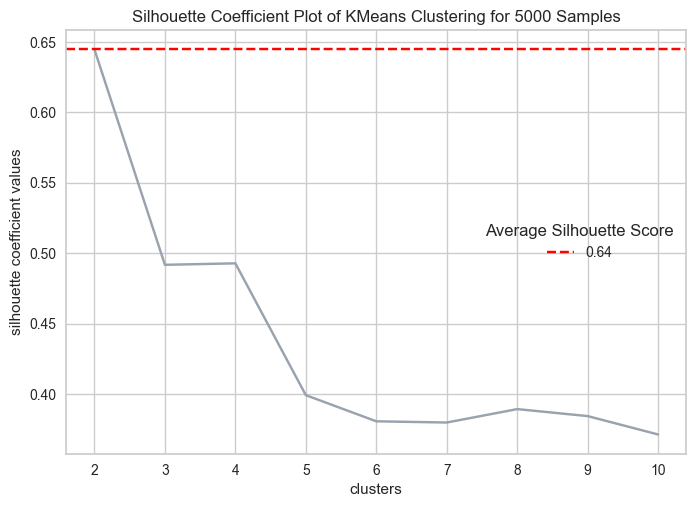

In [22]:
plot_silhouette_coefficients(df_sc, 11)

The highest average silhouette score is found in two clusters. In this sense, the cluster structure is not particularly strong, however, it is not weak either. Every other cluster structure descends into unusability due to a sharp decline, with clusters three and four scratching usability. Therefore, given the usable structure, two clusters are appropriate. As for all other clusters greater than two, they are discarded. A closer examination of the structure is necessary since the silhouette coefficient is only an average.

In [23]:
def KMeans_cluster_assignment(df, n_clusters):
    kmeans = KMeans(n_clusters = n_clusters,
                    init = "k-means++",
                    n_init = 10,
                    random_state = random_state)
    
    labels = kmeans.fit_predict(df_sc)

    df_KMeans = df
    df_KMeans["cluster"] = labels

    return df_KMeans

In [24]:
df_KMeans = KMeans_cluster_assignment(df_ana_sub, 2)

In [25]:
def plot_cluster_assignments(df):
    counts = df["cluster"].value_counts().sort_index()
    colors = ["#99a3ae", "#97e5b7"]
    len_c = len(counts)
    
    for i in range(0, len_c):
        plt.bar(counts.index[i],
                counts.values[i],
                color = colors[i])
    plt.title("Cluster Assignments");
    plt.xlabel("cluster");
    plt.ylabel("size");

    cluster = np.linspace(0, len_c - 1, len_c).astype(int)
    plt.xticks(cluster);

    return

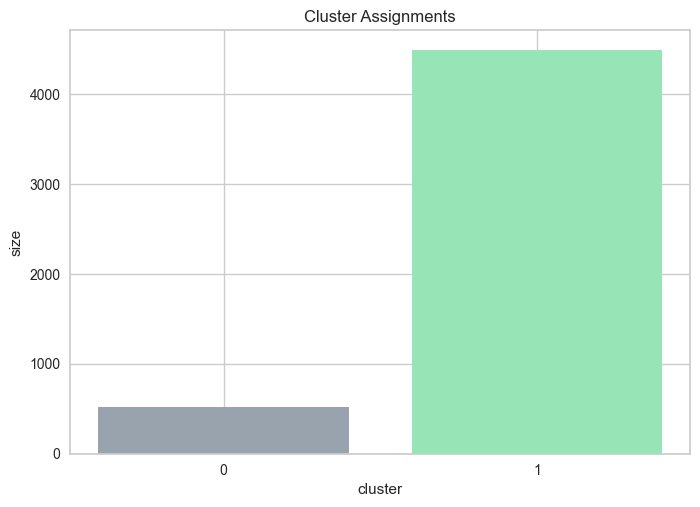

In [26]:
plot_cluster_assignments(df_KMeans)

In [27]:
def plot_silhouette(df_sc, n_clusters):
    kmeans = KMeans(n_clusters = n_clusters,
                    init = "k-means++",
                    n_init = 10,
                    random_state = random_state)
    
    visualizer = SilhouetteVisualizer(estimator = kmeans, 
                                      colors = "flatui", 
                                      is_fitted = False)
    visualizer.fit(df_sc).finalize()
    visualizer.show()

    return

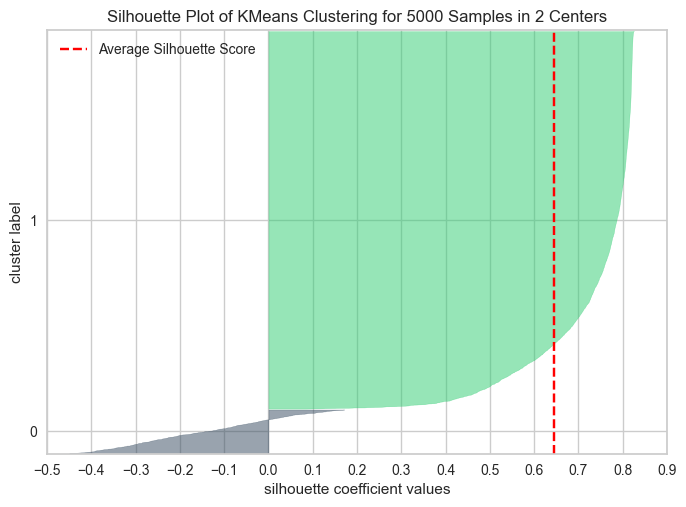

In [28]:
plot_silhouette(df_sc, 2)

The weaker cluster has relatively few instances, whereas the stronger cluster has relatively many instances. A majority of the instances in the weaker cluster are in the negative range, with the remainder being positive but still significantly below usability, wherefore it is severely lacking in structure. However, none of the instances in the stronger cluster are in the negative range, with many of the instances having high usability, a small portion being usable, and a tiny portion of which is unusable. This cluster seems to have a solid overall structure. Consequently, the weaker cluster drags down the average silhouette score. It is further evident from the largely negative instances that the majority of observations tend to be closer to the stronger cluster than to their own.

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 175%; text-align: center; border-radius: 10px 10px;">5.3 - Hierarchical Clustering</p>

In [29]:
def plot_dendrogram(df_sc, metrics, linkage):
    for i in range(0, len(linkage)):
        for j in range(0, len(metrics)):
            agg = cluster.AgglomerativeClustering(metric = metrics[j], 
                                                  compute_full_tree = True,
                                                  linkage = linkage[i],
                                                  compute_distances=True)
            agg.fit_predict(df_sc)

            n_samples = len(agg.labels_)
            counts = np.zeros(agg.children_.shape[0])
            for k, merge in enumerate(agg.children_):
                current_count = 0
                for child_idx in merge:
                    if child_idx < n_samples:
                        current_count += 1
                    else:
                        current_count += counts[child_idx - n_samples]
                counts[k] = current_count
            linkage_matrix = np.column_stack([agg.children_, agg.distances_, counts]).astype(float)

            plt.figure(figsize = (18, 5))
            hierarchy.dendrogram(Z = linkage_matrix,
                       truncate_mode = "lastp",
                       color_threshold = np.inf,
                       orientation = "top",
                       show_leaf_counts = True,
                       leaf_font_size = 15,
                       leaf_rotation = 90,
                       link_color_func = lambda x: "#99a3ae")
            plt.title(label = f"Linkage: {linkage[i].capitalize()}")
            plt.xlabel(xlabel = f"leaves")
            plt.ylabel(ylabel = f"{metrics[j]} distance")
            plt.show()

    return

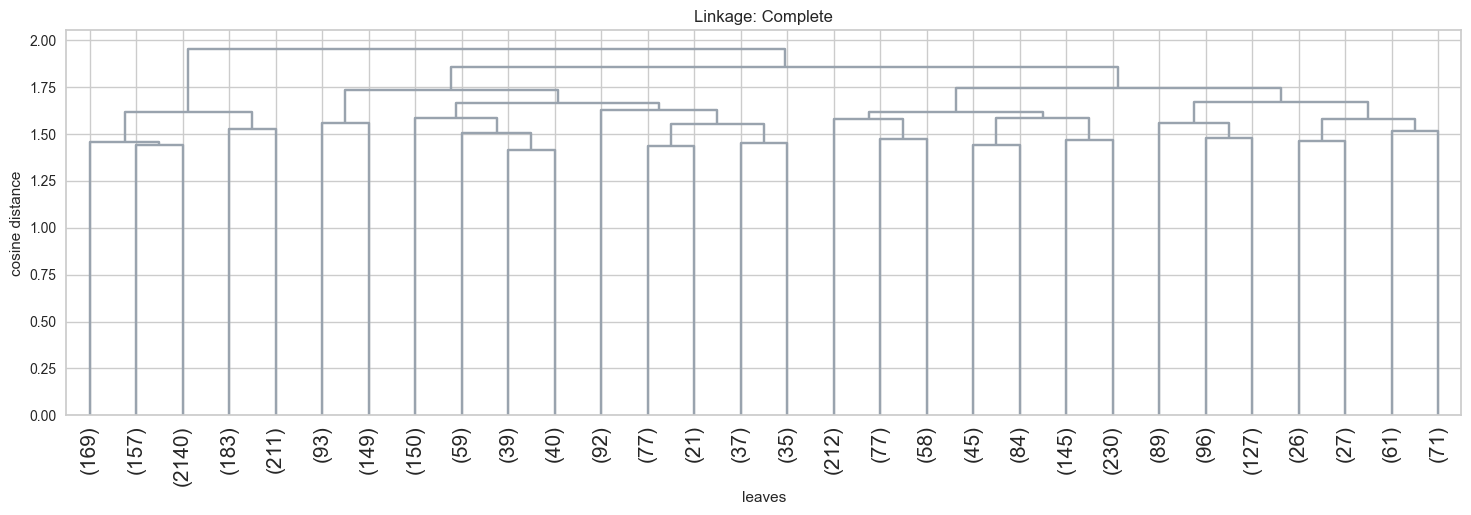

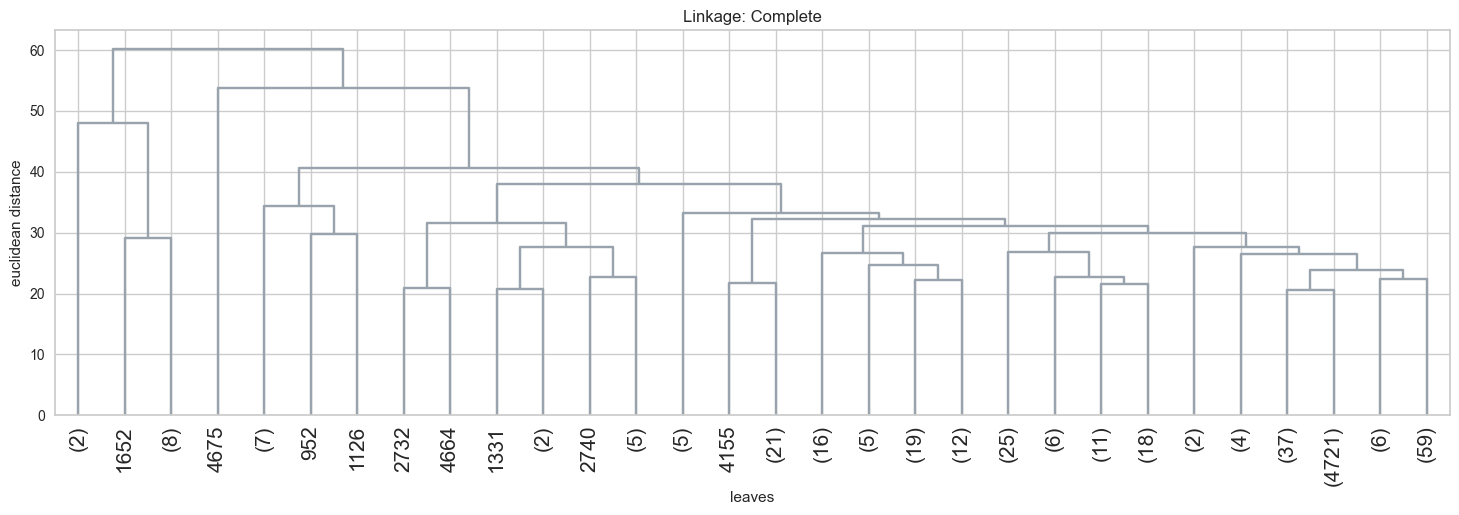

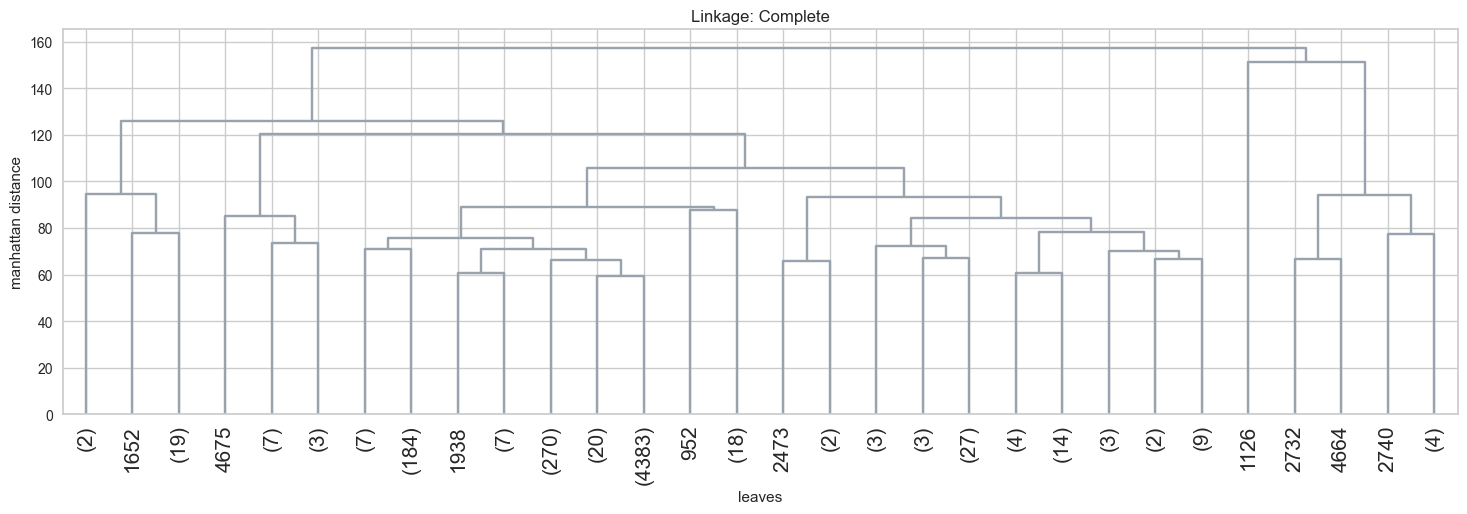

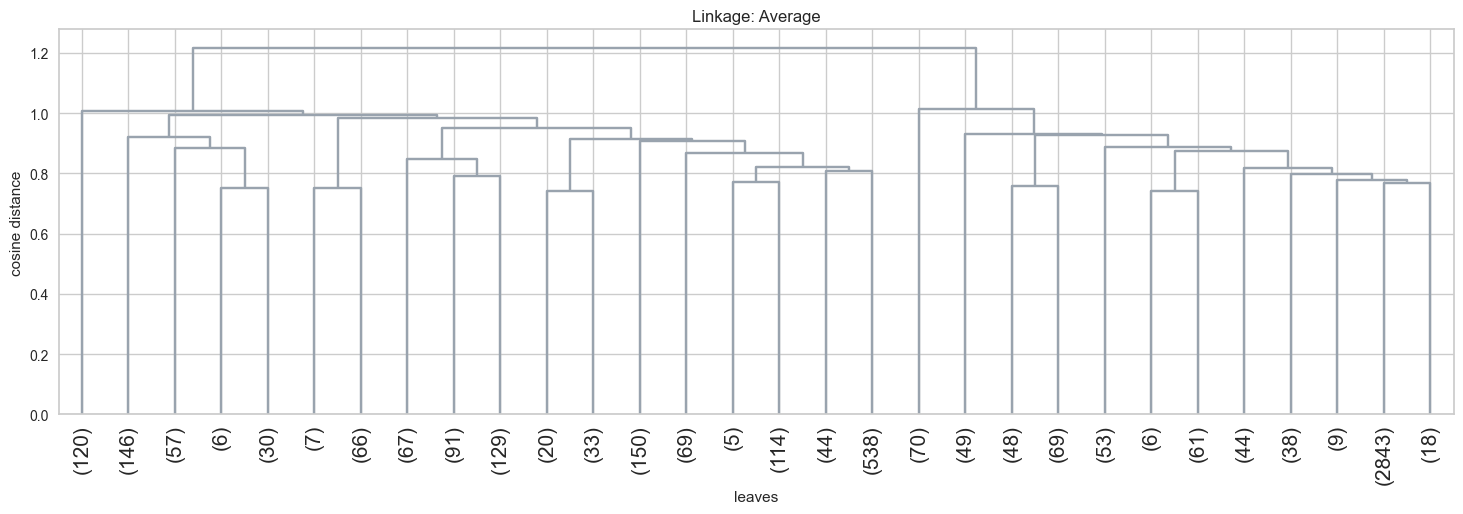

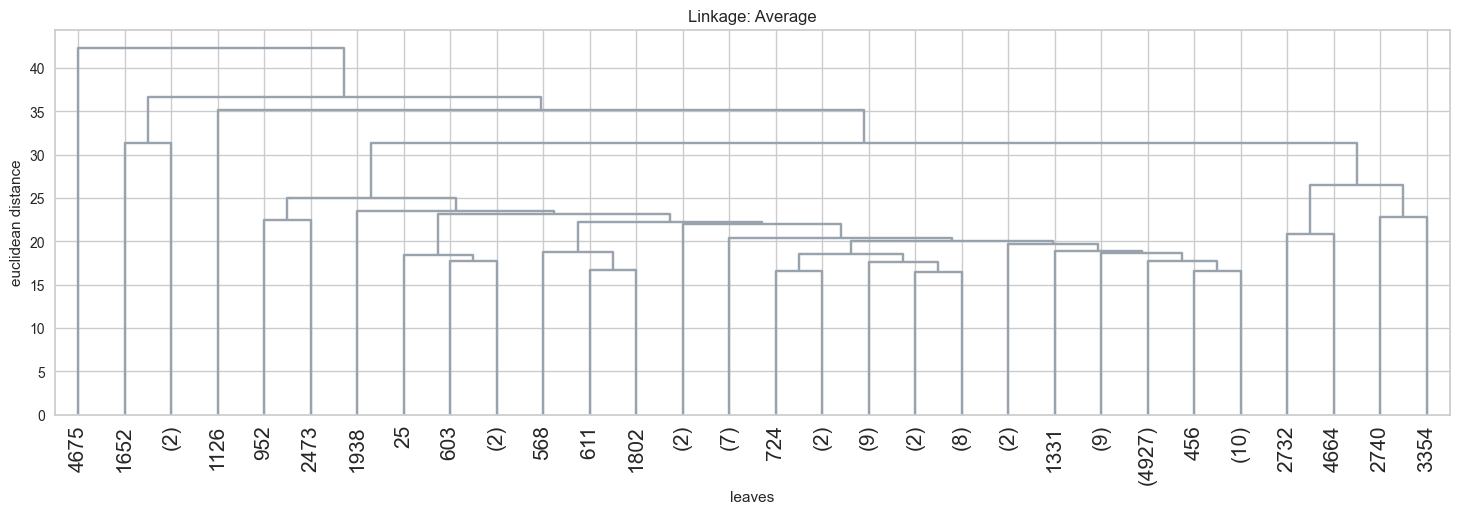

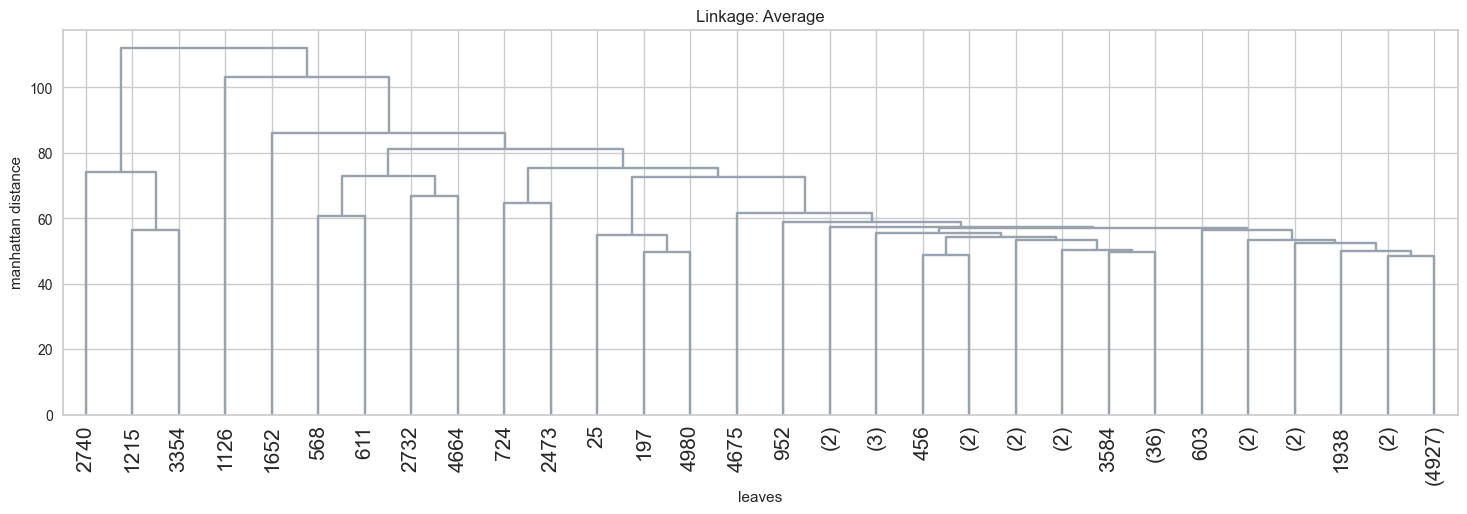

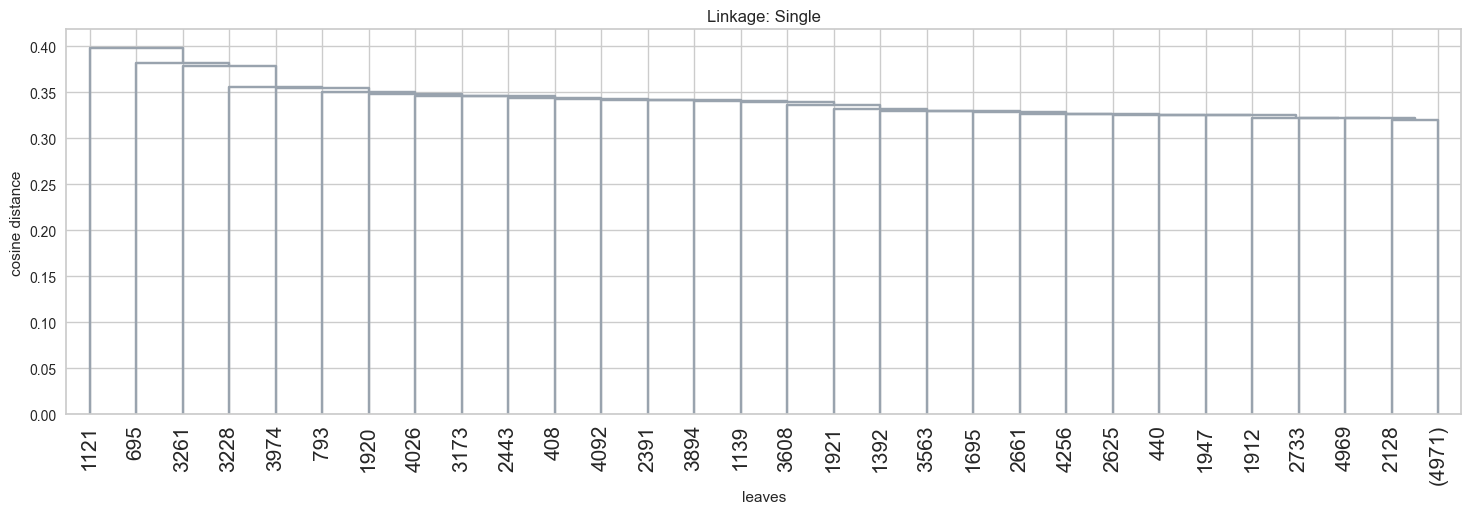

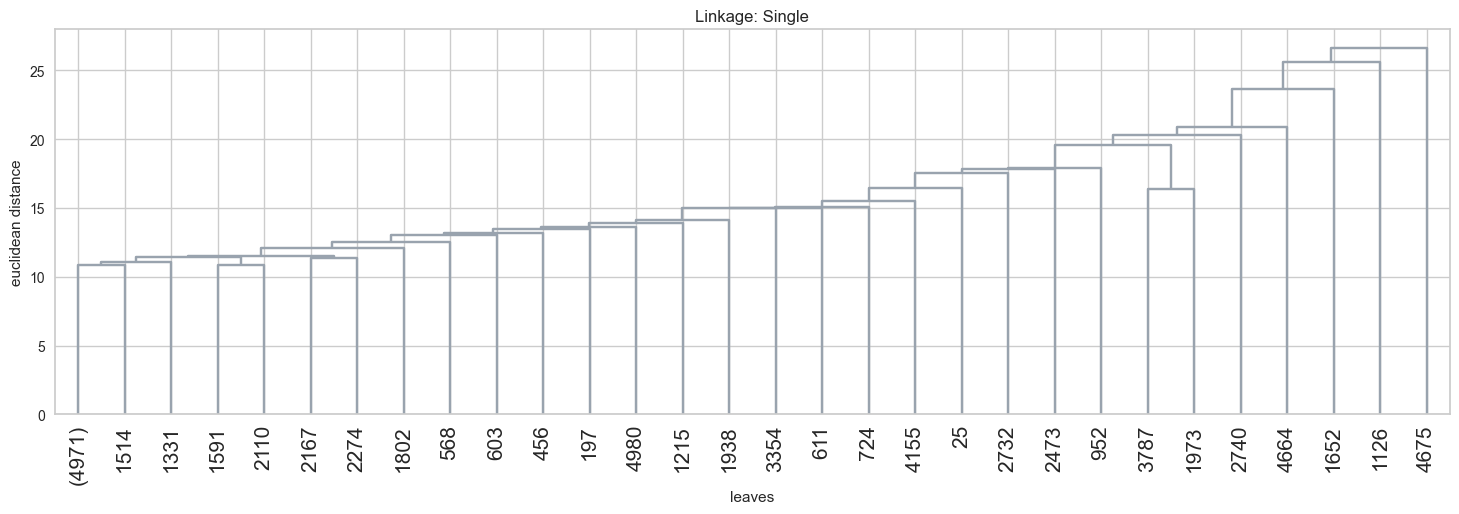

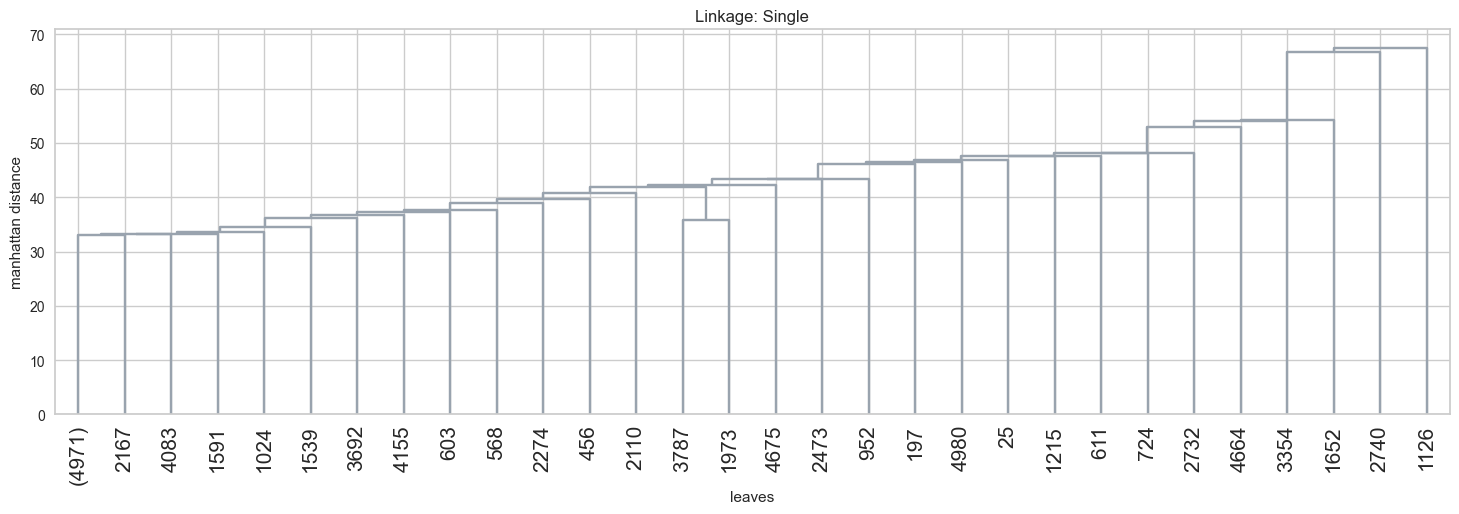

In [30]:
linkage = ["complete", "average", "single"]
metrics = ["cosine", "euclidean", "manhattan"]

plot_dendrogram(df_sc, metrics, linkage)

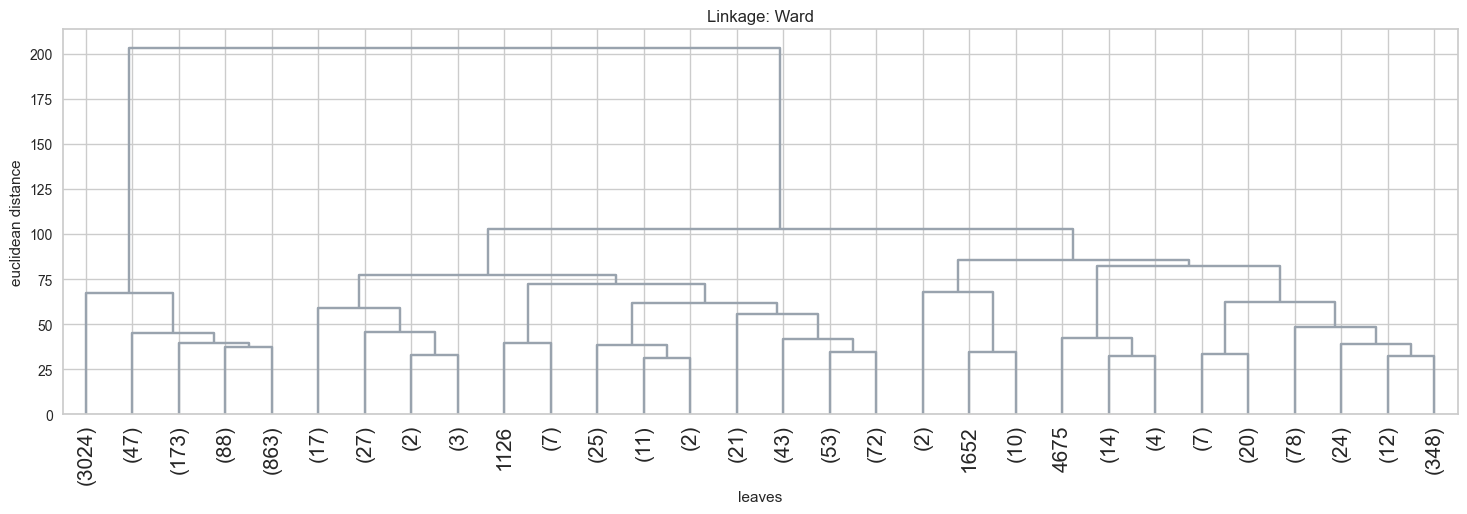

In [31]:
linkage = ["ward"]
metrics = ["euclidean"]

plot_dendrogram(df_sc, metrics, linkage)

Dendrograms in this instance are monochromatic, serving as an indication as to a cutoff point and clustering. Conversely, as no cluster split has been established at this point, color differences are omitted. Considering that the number of available leaves would make a visual inspection infeasible, pruning is performed. The pruned nodes are determined by "lastp", which returns the latest non-singleton nodes and leaf nodes. A default setting of "p" permits the tracing of an existing structure alongside a manageable visual inspection. As it is crucial to avoid overly granular clusters becoming too specific, and thus failing to produce actionable insights, the number of returned nodes is reasonable. Labels of leaf nodes are not enclosed in parentheses, given that the number represents the label of a single leaf. While non-singleton nodes appear with parentheses that indicate the number of leaves contained within the node.

Single linkage dendrograms exhibit an elongated form with a large number of leaf nodes, resembling a long irregular structure, pointing to the chaining effect. Thus, the distances between fused nodes are minimal at all times, preventing separation and identification of a meaningful cutoff point and, therefore, clustering. A cutoff would result in a relatively large cluster and many small clusters with individual instances. In view of the small distances separating the nodes, the cutoff point would be arbitrary, and the resulting clusters would have little practical significance. In a somewhat weaker form, the complete linkage dendrogram based on Euclidean and Manhattan distance also falls victim to the same theme. In contrast, there is no such effect on the complete linkage of the remaining metrics. Despite this, the cosine metric has short branches, resulting in leaves within nodes and nodes themselves looking quite similar, indicating a weak structure among clusters. The compromise between the single and complete linkage, the average linkage, resembles the equivalent in complete with the Manhattan and Euclidean metric, thus exhibiting similar weaknesses. While the cosine metric simply combines both problems. By contrast, the ward linkage with the Euclidean metric yields two nodes, each with relatively short branch lengths, demonstrating similarity in their leaves. While the nodes themselves have relatively long branches, indicating dissimilarity between them, suggesting a usable overall structure. As a result, the clusters are distinct, neither consisting of a few individual instances. However, it should be noted that one cluster contains significantly more instances than the other. Further, substructures within clusters exhibiting chaining effects are observed. Nevertheless, it has the best structure of any dendrogram, which is why it is selected. Here, the cutoff point represents the trend break in similarities, in which distances are particularly great, leading to two clusters.

In [32]:
def HCA_cluster_assignment(df, n_clusters, metric, linkage):
    agg = cluster.AgglomerativeClustering(n_clusters = n_clusters,
                                          metric = metric, 
                                          linkage = linkage)
    
    labels = agg.fit_predict(df)
    df_HCA = df
    df_HCA["cluster"] = labels

    return df_HCA

In [33]:
df_HCA = HCA_cluster_assignment(df_ana_sub, 2, "euclidean", "ward")

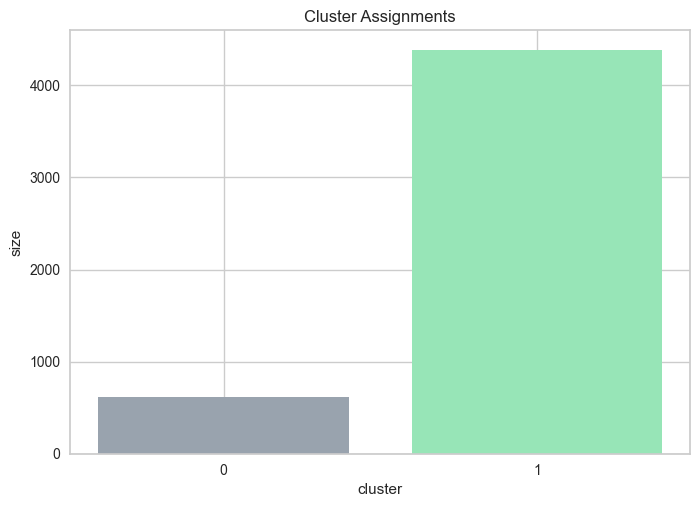

In [34]:
plot_cluster_assignments(df_HCA)

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 6 - Dimensionality Reduction</p>

In an attempt to further improve the structure of clusters, i.e. user segments, the PCA algorithm is employed to reduce the number of features.

In [35]:
def variance_per_feature(df_sc):
    pca = PCA1()
    df_pca = pd.DataFrame(pca.fit_transform(df_sc),
                          index = df_sc.index)
    expl_var = pca.explained_variance_ratio_

    print(f"|{'Principal Component':^21}|{'Explained Variance':^20}|")
    print(f"-" * 44)
    for i in range(0, len(expl_var)):
        print(f"|{i + 1:^21}|{np.round(a = expl_var[i], decimals = 4):^20}|")

In [36]:
variance_per_feature(df_sc)

| Principal Component | Explained Variance |
--------------------------------------------
|          1          |       0.3517       |
|          2          |       0.0706       |
|          3          |       0.0578       |
|          4          |       0.0552       |
|          5          |       0.0464       |
|          6          |       0.0452       |
|          7          |       0.0423       |
|          8          |       0.0404       |
|          9          |       0.0386       |
|         10          |       0.0316       |
|         11          |       0.0298       |
|         12          |       0.0284       |
|         13          |       0.0256       |
|         14          |       0.0215       |
|         15          |       0.021        |
|         16          |       0.0204       |
|         17          |       0.0181       |
|         18          |       0.0162       |
|         19          |       0.0156       |
|         20          |       0.013        |
|         

In [37]:
def plot_PCA_explanation(df_sc, n_components):
    pca = PCA1()
    df_pca = pd.DataFrame(pca.fit_transform(df_sc),
                          index = df_sc.index)
    expl_var = pca.explained_variance_ratio_
    retain = np.sum(expl_var[:n_components])

    plt.title("Scree Plot");
    plt.xlabel("principal component");
    plt.ylabel("variance");
    plt.axhline(y = retain,
                color = "#fe0101",
                linestyle = "--",
                label = f"{n_components}. Feature with {np.round(a = retain, decimals = 4)}");
    legend_1 = plt.legend(title = "Cutoff Point",
                          loc = "center right")
    plt.gca().add_artist(legend_1);
    explained_accumulated_variance, = plt.plot(np.add.accumulate(expl_var), 
                                               label = "Accumulated",
                                               color = "#99a3ae")
    explained_variance, = plt.plot(expl_var, 
                       label = "Non Accumulated",
                       color = "#97e5b7")
    legend_2 = plt.legend(title = "Explained Variance",
                          handles = [explained_accumulated_variance,
                                     explained_variance], 
                          loc = "upper left");
    plt.gca().add_artist(legend_2);

    return

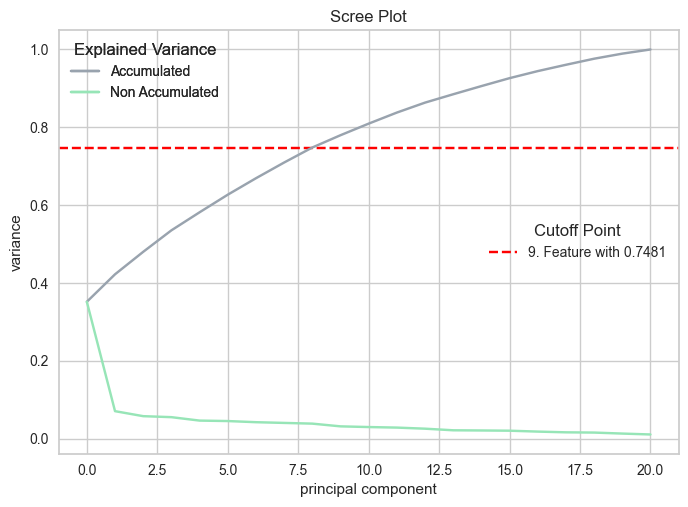

In [38]:
plot_PCA_explanation(df_sc, 9)

In [39]:
def PCA_dataframe(df_sc, n_components):
    model = PCA2(n_components = n_components)
    results = model.fit_transform(df_sc)
    df_pca = model.results["PC"]

    return df_pca

In [40]:
df_pca = PCA_dataframe(df_sc, 9)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [21] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[9]


[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


Over 80% of the variance is accounted for by the first ten principal components. A large share (35.17%) is held by the variance of the first principal component. Among the subsequent principal components, from two to ten, variances range between 7.06% and 3.16% percent. Each component that is yet to be mentioned varies between 2.98% and 1.07%. As such, there is a sharp drop in variance after the first principal component. Three small yet relatively sharp declines are observed between 7.06% and 5.78%, between 5.52% and 4.64%, and between 3.86% and 3.16%. Only 42.23% or 53.53% of the overall variance would be reflected in a cutoff in the first or second drop. By the third drop, however, the variance has already reached 74.81%, at which point all other principal components differ only marginally and make relatively little contribution to the overall variance. The point in question represents an optimal compromise between retaining the variance and reducing the features by more than half. In light of this, nine principal components should be retained.

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 7 - Clustering II</p>

Here, clustering algorithms are applied again to extract individual segments of users, based on the PCA-reduced DataFrame. As such, this is being done in the expectation that the user segment structure will be improved.

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 175%; text-align: center; border-radius: 10px 10px;">7.1 - KMeans</p>

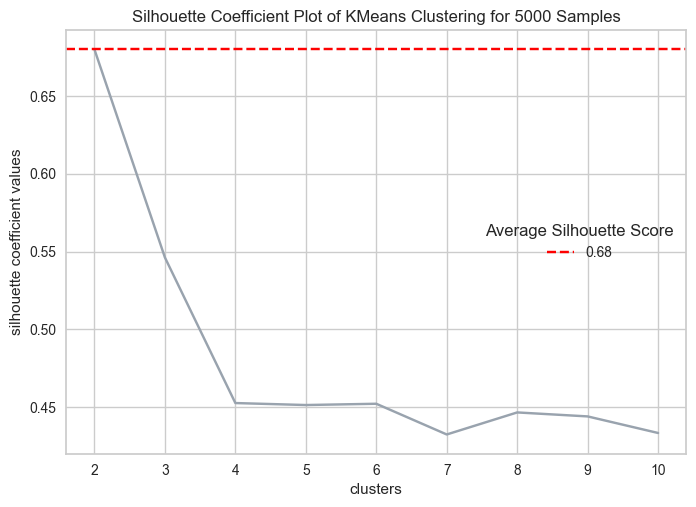

In [41]:
plot_silhouette_coefficients(df_pca, 11)

The average silhouette score in two clusters is 0.68, an increase of 0.04 over the pre-PCA score, maintaining its peak position. Thus, the cluster structure is not incredibly strong, but not unusable either. It is, however, very close to having a strong structure. Among all other clusterings (three to ten), silhouette scores increased by 0.05 on average. Despite all these factors, a sharp drop from two clusters to three is still evident. Even so, three clusters and four clusters can be considered usable, whereas the remainder remains unusable. In view of the relatively large difference between the three clusters and two clusters, two clusters are still recommended, due to their close proximity to a strong structure.

In [42]:
df_pca_KMeans = KMeans_cluster_assignment(df_pca, 2)

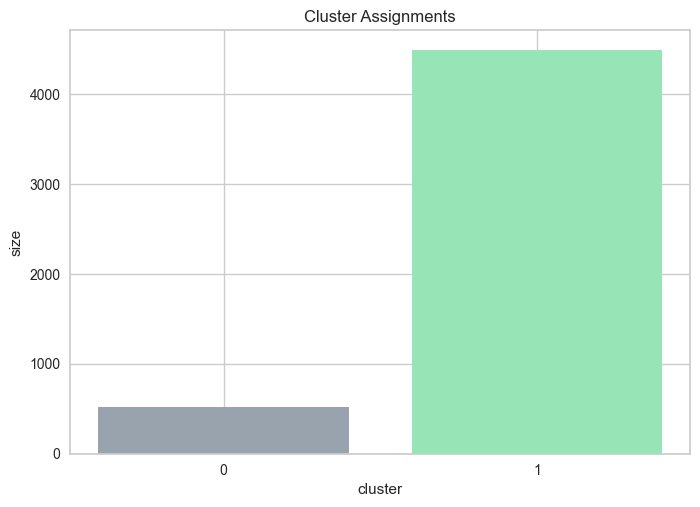

In [43]:
plot_cluster_assignments(df_pca_KMeans)

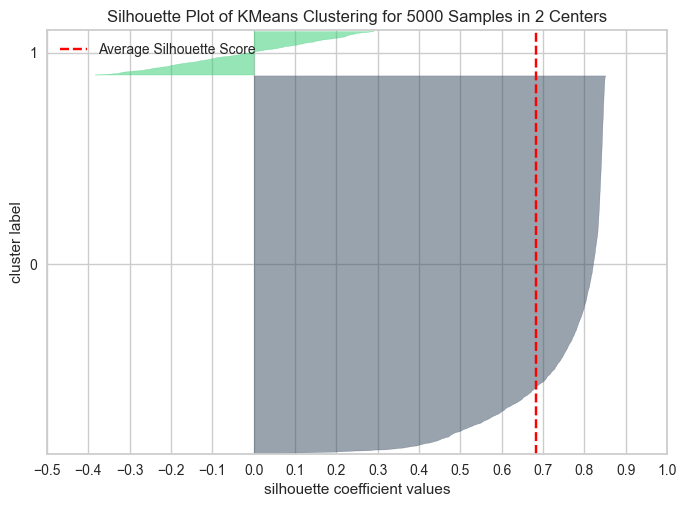

In [44]:
plot_silhouette(df_pca, 2)

The distribution of cluster members remains similar to prior PCA. It is also worth pointing out that an even share of the weaker cluster lies within positive territory, as opposed to a minority in the past. Positive silhouette scores increased among such members, yet are still far below satisfactory levels. All the remainder exhibit the same negative magnitudes as previously. Accordingly, the weaker cluster appears better structured, albeit unusable. While the stronger cluster's posture slightly improved across the board compared to before. Thus, a solid structure is observed. Despite positive growth, the weaker cluster continues to depress the overall average silhouette score. Nevertheless, close to half of the observations inhabiting the weaker cluster reside at a greater distance from observations of the stronger cluster than they do from observations of their own kind. Moreover, on the observation side, the dominant cluster is expressed as the weak cluster, whereas the subordinate cluster is expressed as the strong cluster.

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 175%; text-align: center; border-radius: 10px 10px;">7.2 - Hierarchical Clustering</p>

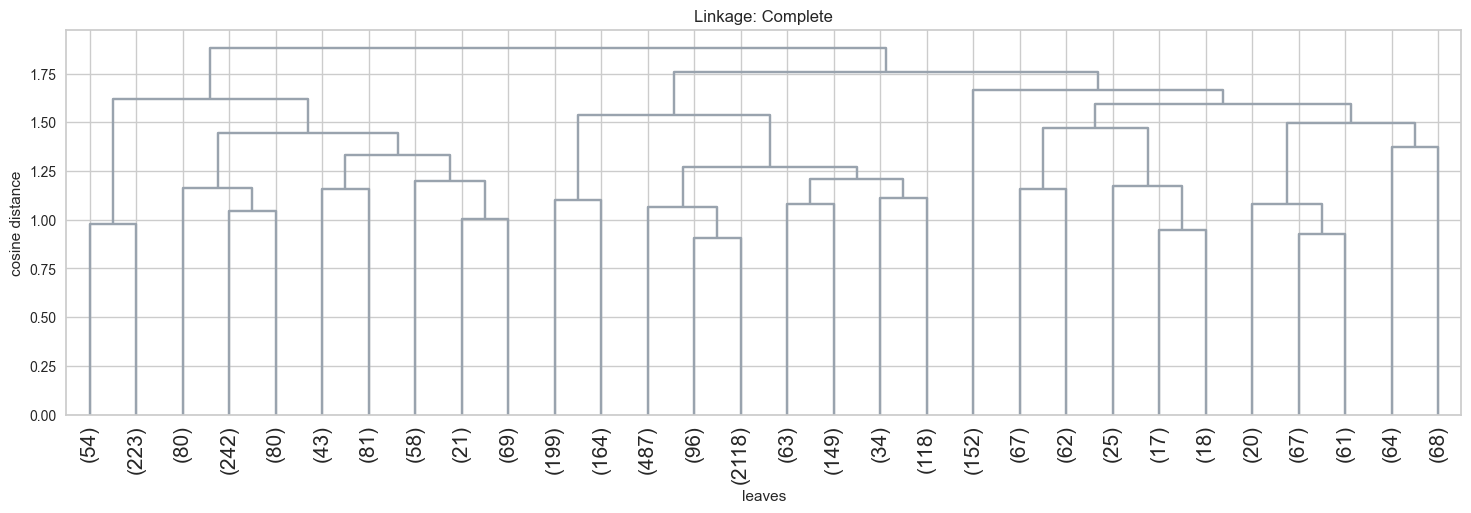

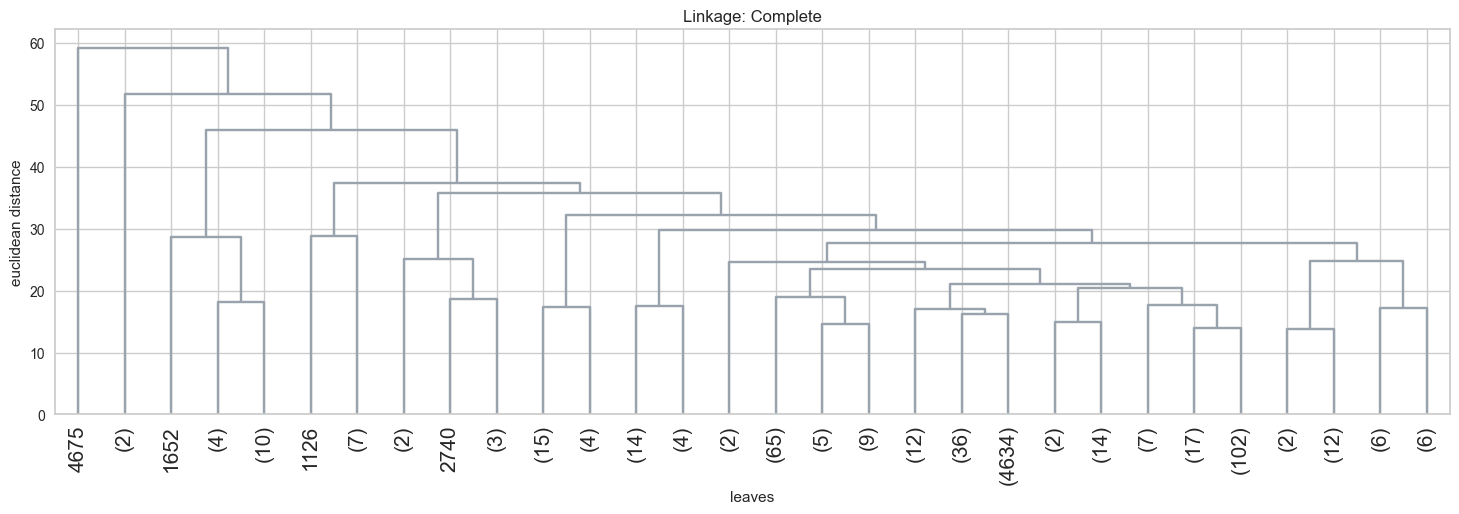

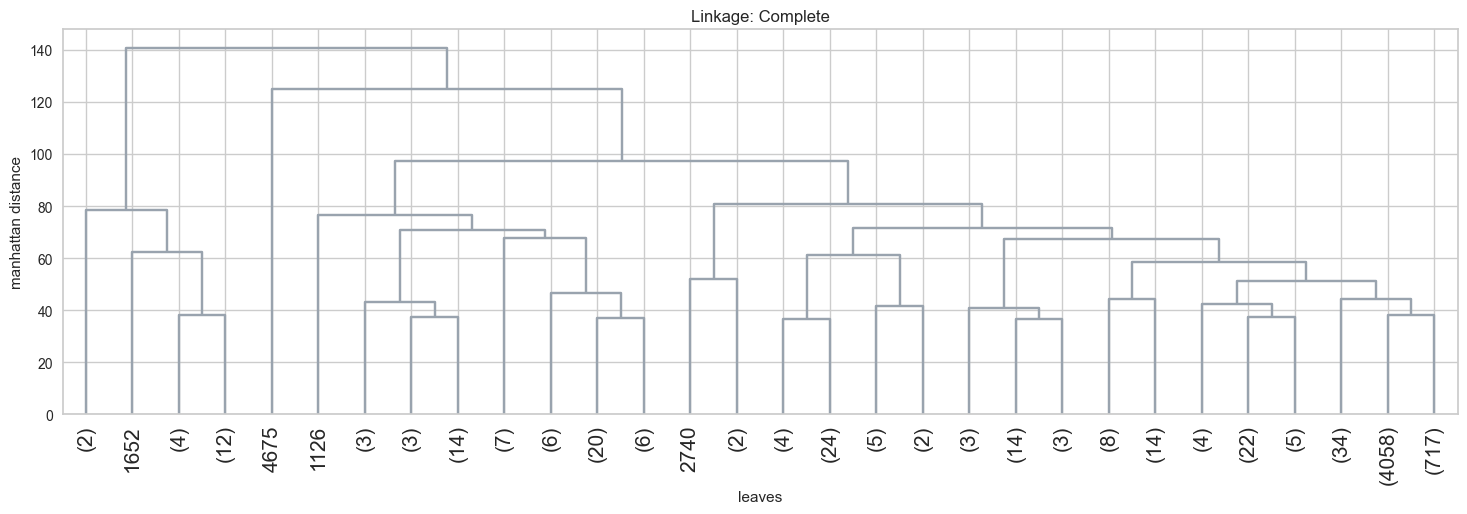

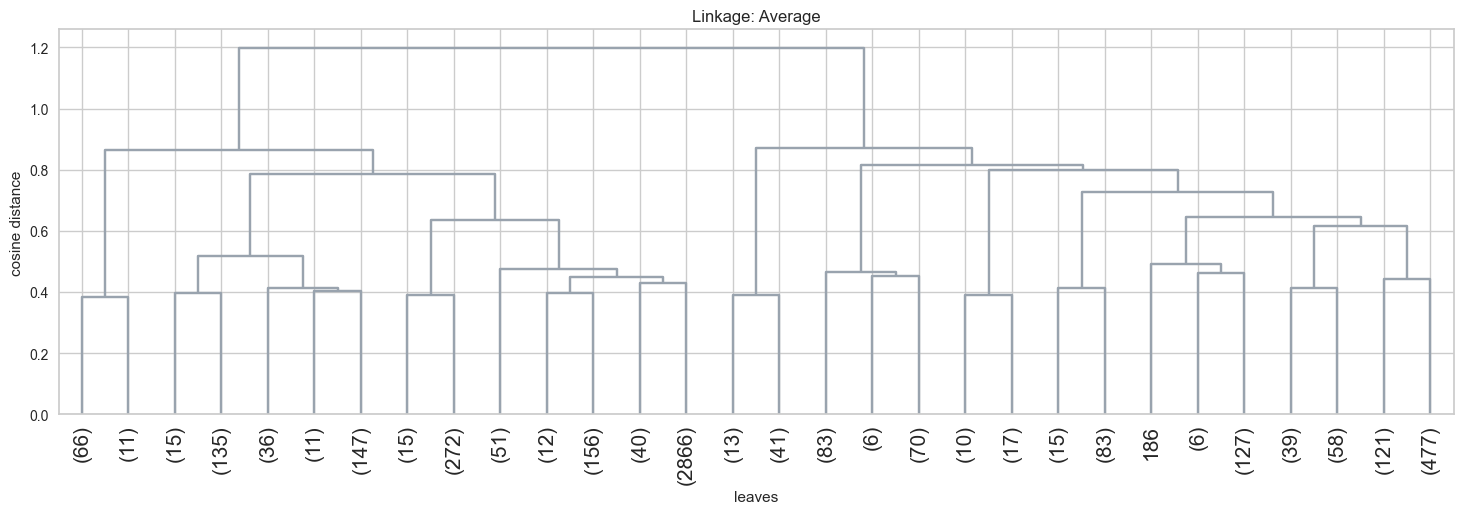

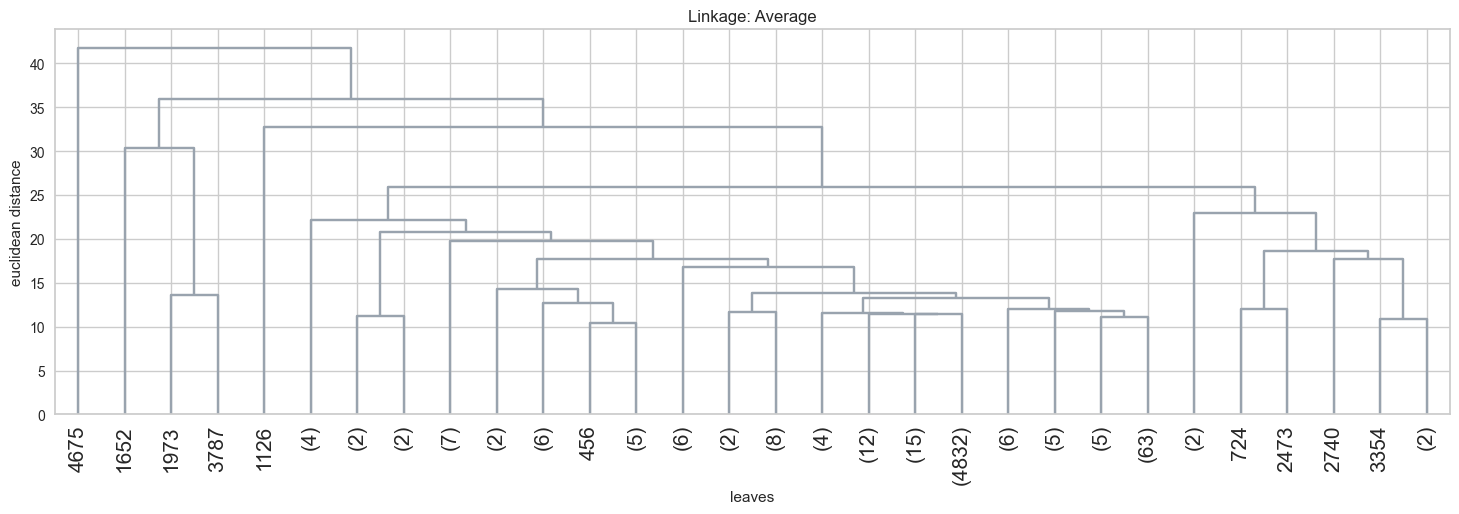

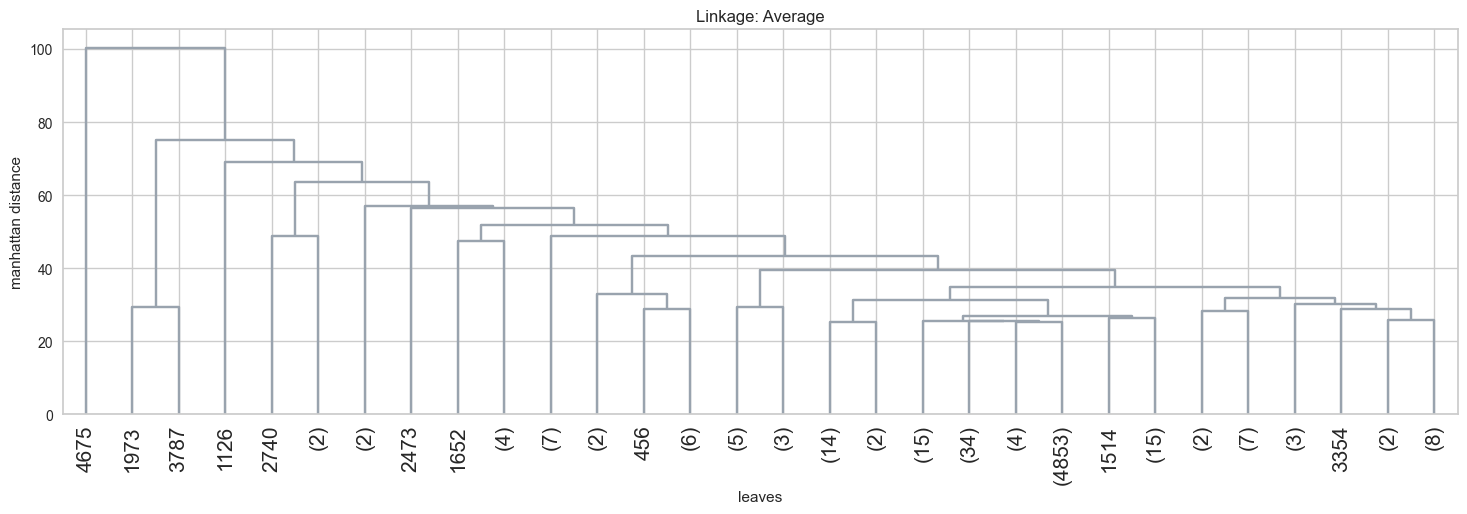

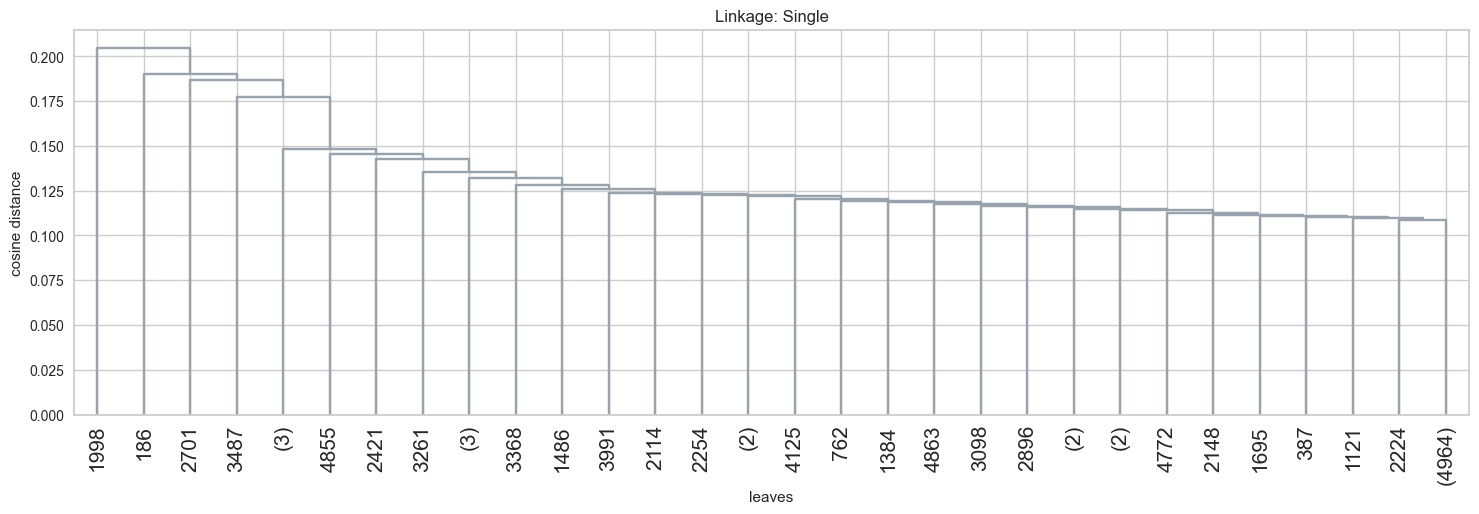

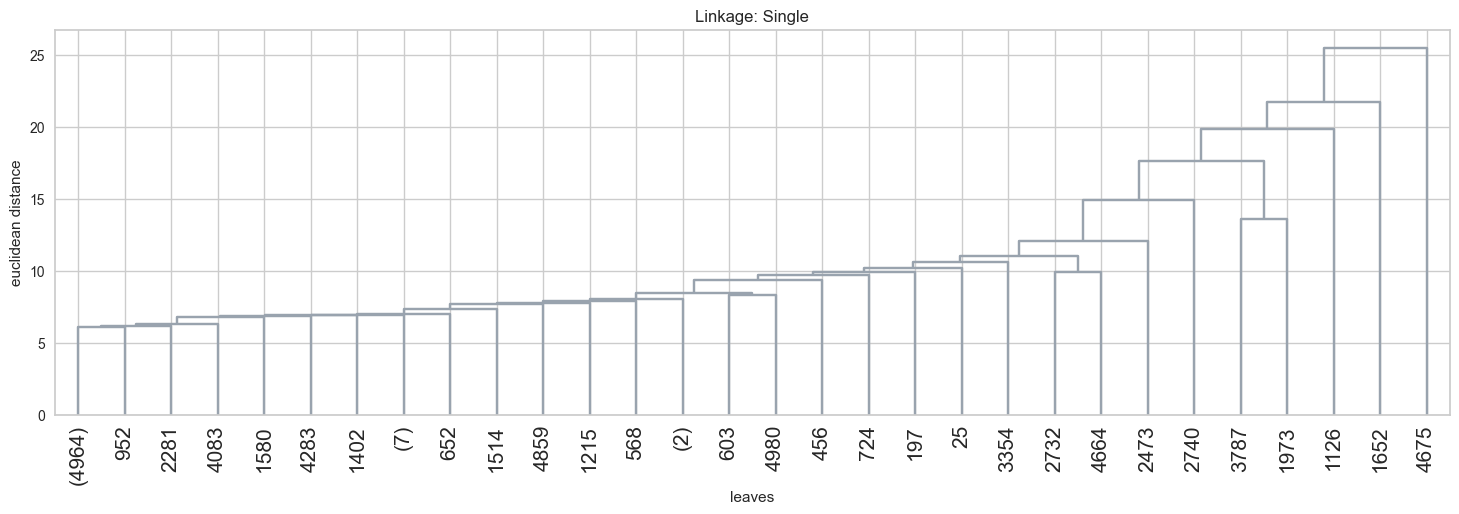

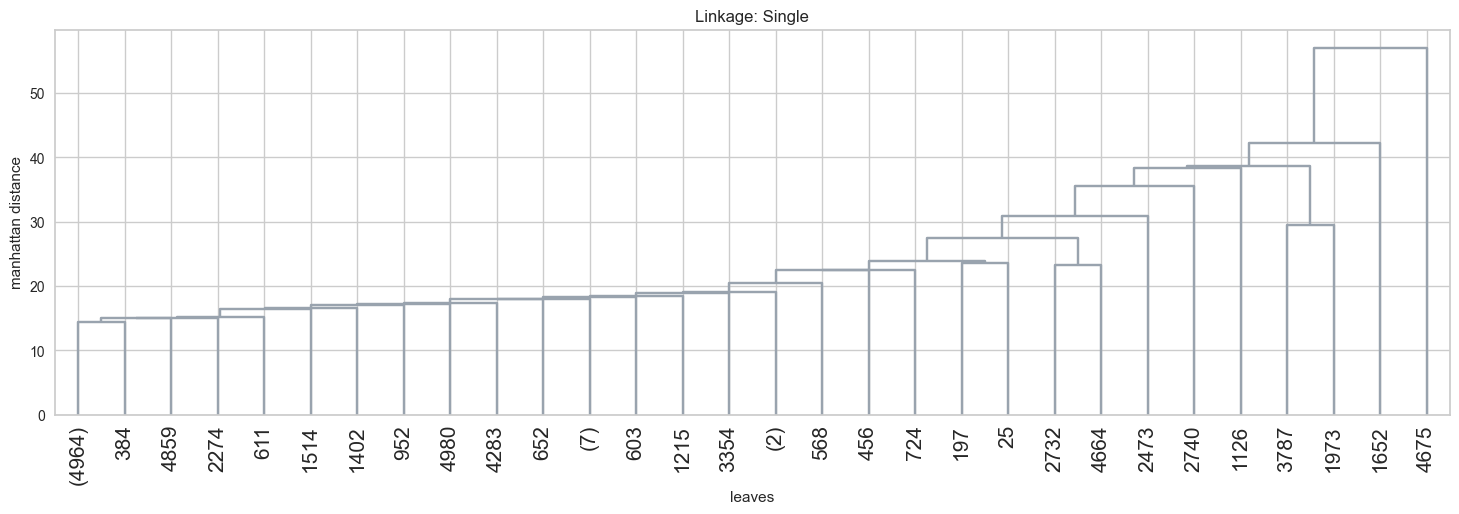

In [45]:
linkage = ["complete", "average", "single"]
metrics = ["cosine", "euclidean", "manhattan"]

plot_dendrogram(df_pca, metrics, linkage)

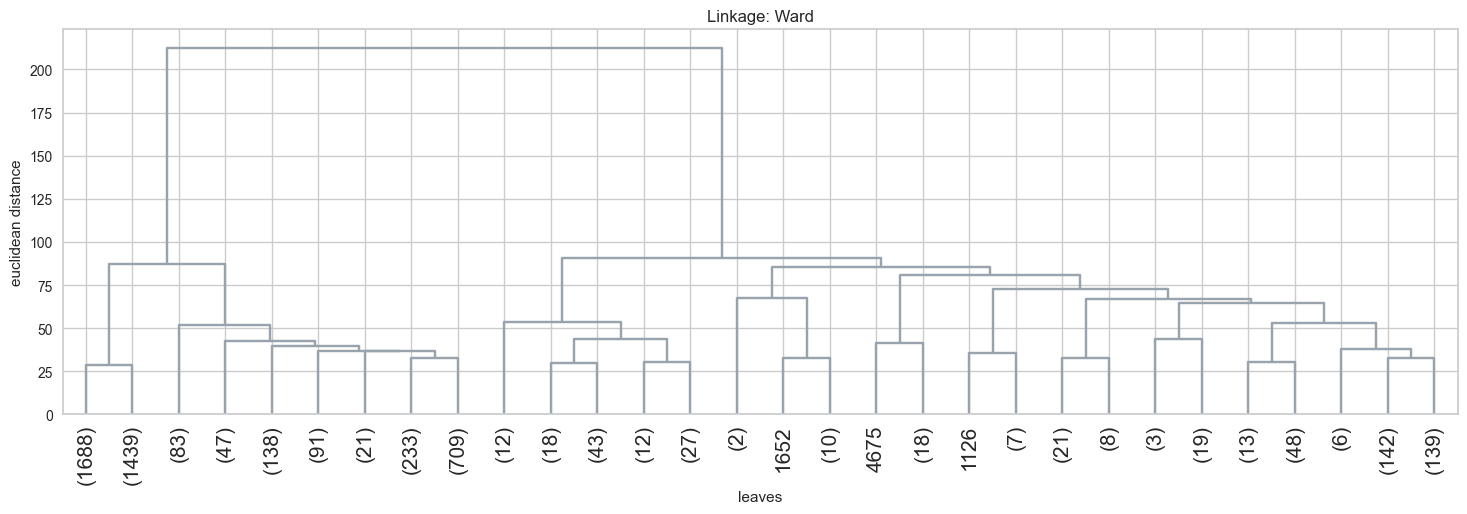

In [46]:
linkage = ["ward"]
metrics = ["euclidean"]

plot_dendrogram(df_pca, metrics, linkage)

PCA reveals three main observations. Observation one is that chaining effects slightly worsened when present. Second, if such effects were absent, the structure slightly improved. As can be seen in observation three, however, if there was a mixture, the structure changed such that the chaining effect became dominant. The consequences of this were as follows.

<center>

<b>Observation 1</b>

<em>all single linkages and Euclidean as well as Manhattan complete and average linkages deteriorated slightly in terms of chaining effects</em>

<b>Observation 2</b>

<em>cosine complete linkage slightly improved its structure</em>

<b>Observation 3</b>

<em>cosine average linkage deteriorated into chaining effects</em>

</center>

Considering that the Euclidean ward linkage used prior to PCA is a special case, it is noted separately. The leaves of the selected nodes showed a mixed form, so that the structure deteriorated into chaining effects, producing even more similar leaves. However, there was no chaining effect on the two nodes themselves, which implies that those moved in similarity slightly apart according to observation two. The overall structure improved, which is why the same linkage is selected again, retaining the same number of clusters. As compared to prior PCA, the distribution of cluster observations appears to be the same.

In [47]:
df_pca_HCA = HCA_cluster_assignment(df_pca, 2, "euclidean", "ward")

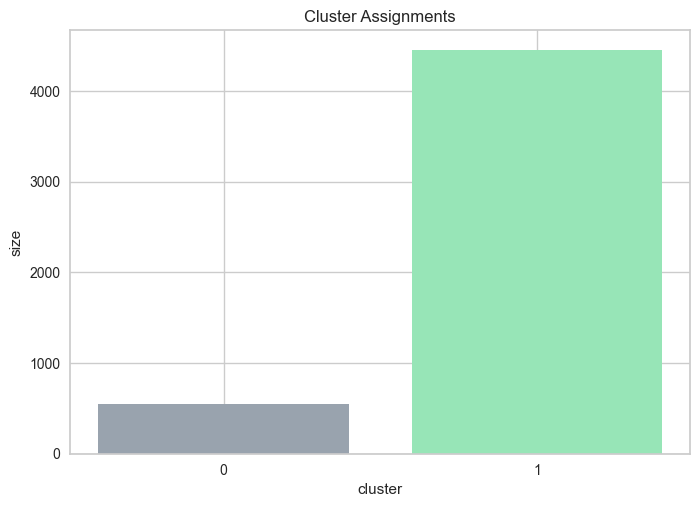

In [48]:
plot_cluster_assignments(df_pca_HCA)

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 8 - Cluster Interpretation</p>

In the course of this chapter, a clustering, i.e. a certain arrangement of segments of users, is selected, visualized, and its behavior is extracted. As a result, the goal set at the beginning should be achieved.

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 175%; text-align: center; border-radius: 10px 10px;">8.1 - Cluster Selection</p>

Statistics suggest the existence of a cluster with a particularly strong structure, in K-Means. As opposed to hierarchical clustering, which is not indulging in statistical means, for structure evaluation. Such evaluation relies on eyeballing, subject to human error. Eyeballing is affected by variables such as dendrogram reading and domain knowledge. Due to the absence of a domain expert within this experiment, the eyeballing conducted, and thus the clustering may be flawed. As such, K-Means will be used for now until domain experts are consulted.

Moreover, the PCA-reduced DataFrame is considered, in light of the project's requirement for visualization. Reduced principal components represent the initial features in their variance. As such, it is to be ensured to the greatest degree possible, that the DataFrame, is meaningfully visualized within a two-dimensional plot. While the selection of features within a non-PCA reduced DataFrame to be visualized would be arbitrary, wherefore its meaningfulness is questionable. However, 25.19% of the variance was lost at the expense of the unusable cluster. The cluster whose structure was already strong only showed minimal improvement. This resulted in a loss of variance for little benefit. Even so, as 74.81% is still a significant amount, the upside far outweighs the downside.

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 175%; text-align: center; border-radius: 10px 10px;">8.2 - Cluster Visualization</p>

In [49]:
def plot_clusters_with_centers(df_sc):
    colors = ["#99a3ae", "#97e5b7"]
    cols = df_sc.columns

    kmeans = KMeans(n_clusters = 2,
                    init = "k-means++",
                    n_init = 10,
                    random_state = random_state)
    cluster_assignments = kmeans.fit_predict(df_sc)
    cluster_centers = kmeans.cluster_centers_

    plt.figure(figsize = (8, 8))
    for i in range(0, len(np.unique(cluster_assignments))):
        plt.scatter(df_sc[cluster_assignments == i][[cols[0]]], 
                    df_sc[cluster_assignments == i][[cols[1]]], 
                    c = colors[i], 
                    label = i)
    plt.scatter(
        cluster_centers[:, 0],
        cluster_centers[:, 1],
        s = 350, 
        marker = "*", 
        c = "#fe0101", 
        edgecolor = "#fe0101")
    plt.title("K-Means Clustering")
    plt.xlabel("principal component one")
    plt.ylabel("principal component two")
    plt.legend(title = "Cluster",
               loc = "upper left")
    
    return

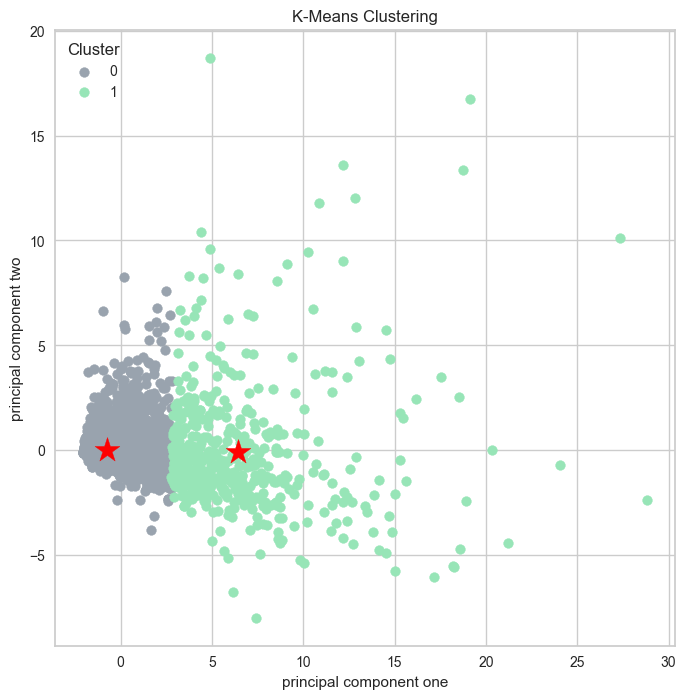

In [50]:
plot_clusters_with_centers(df_pca)

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 175%; text-align: center; border-radius: 10px 10px;">8.3 - Analysis</p>

In light of the lack of unambiguity among the principal components, hindering cluster analysis, decoding is requisite. As a means of decoding the behavior of users by segment, PCA-based cluster assignments are tied to the originating dataset. Considering that all instances of both datasets share identical order while being similar in quantity, the feature "cluster" can be conveniently overridden.

In [51]:
df_KMeans["cluster"] = df_pca_KMeans["cluster"]

A mean demand per department is estimated to show the central tendency among user segments. As a result, an anchor is established, contextualizing the segments of users in a clear and concise manner, giving rise to analysis.

In [52]:
means = df_KMeans.groupby("cluster").mean()

In [53]:
def plot_rows_as_bar(means):
    row_number = means.shape[0]
    fig, ax = plt.subplots(nrows = row_number,
                           ncols = 1,
                           figsize = (15, 10));
    fig.suptitle("Analysis");
    plt.subplots_adjust(hspace = 0.25);

    colors = ["#99a3ae", "#97e5b7"]
    x_max = math.ceil(np.amax(means) / 25) * 25
    x_ticks = np.linspace(0, x_max, int((x_max / 25) + 1))
    
    for i in range(0, row_number):
        row = means.iloc[[i]]
        row = pd.melt(row, 
                      var_name = "y", 
                      value_name = "x")
        sns.barplot(data = row, 
                    x = "x", 
                    y = "y",
                    ax = ax[i],
                    color = colors[i]);
        ax[i].yaxis.set_label_text("");
        ax[i].set_title(f"Cluster {i}");
        ax[i].set_xlabel("purchases per department (mean)");
        ax[i].set_xticks(x_ticks);
        if i != row_number:
            ax[0].xaxis.set_label_text("");

    return

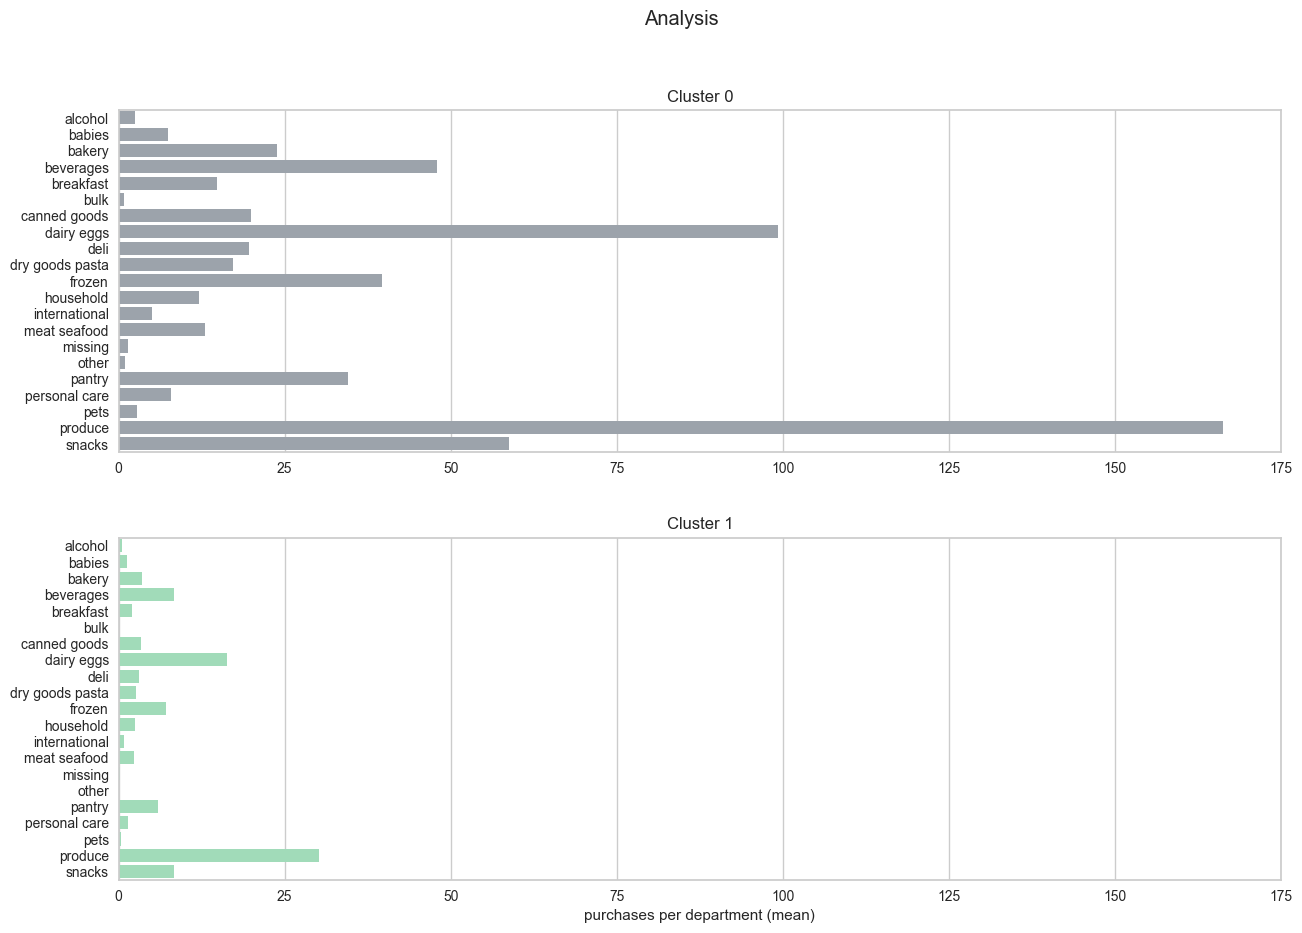

In [54]:
plot_rows_as_bar(means)

The plot illustrates a comparison of mean demand by department, as derived from the initial pre-processed dataset, grouped by clusters, as determined by the K-Means algorithm applied to the standard scaler and PCA-prepared dataset. A relatively high mean suggests tendencies among clusters to gravitate towards a given department. In contrast, low means suggest aversion.

Cluster one shares many similarities with cluster zero, albeit on a smaller scale. The reason is that about half of the members are closer to cluster zero members than to any of their own members. While the remaining half of the cluster has a weak structure, meaning hardly any in common, expressed as high variance, producing low means for members other than those similar to cluster zero. Therefore, cluster one bears little significance.

A high mean is experienced by departments for "produce" and "dairy eggs". While "snacks", "beverages", "frozen", "pantry", "bakery", "canned goods", "deli", "dry goods pasta", "meat seafood", "household", and "babies" demonstrate a moderate mean. As for "personal care", "international", "pets", "alcohol", "missing", "other", and "bulk" means are low.

<p style="background-color:#080808; font-family: arial; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 9 - Conclusion and Future Work</p>

As for the extraction of user segments, K-Means was run on a standard scaler and PCA-prepared dataset. The mean demand per department group revealed cluster tendencies. Those tendencies are either positive for above average mean data points, or negative for below average mean data points. As evidenced by their high mean data points, departments such as "produce" and "dairy eggs" dominate. While departments such as "pets", "alcohol", "missing", "other", and "bulk" appear subordinate, reflected in their low mean values. All of these statements refer to cluster zero due to the weak structure and correspondingly negligible significance of cluster one. In light of this, the following hypothesis might be viable.

<center>

<b>Hypothesis</b>

<em>The observation wise weaker user segment cluster zero seems more prone to orders from the departments of "produce" and "dairy eggs", while appearing adverse towards "pets", "alcohol", "missing", "other", and "bulk".</em>

</center>

These experiments have been designed to extract user segments and differences, thus yielding insight for predictive marketing efforts (personalized recommendations, promotions). By clustering, user segments were established, giving rise to an observationally strong and weak cluster. Half of the stronger cluster was closer to cluster zero than to its own kind, with the remainder falling well below desirable structures. Thus, cluster one posed high variance, rendering it impractical, wherefore many observations remained without a hypothesis. While the observational-wise weaker user segment revealed tendencies as to which products might be promotable as well as recommendable and which might not. Please note, however, that this analysis relies on means, prone to outliers and thus errors in the circumstance of few observations. In view of the imbalance to the detriment of the cluster considered, the hypothesis might be flawed.

As a next step, the hypothesis ought to be validated before being put into action. A validated hypothesis may serve as a recommendation for personalized user recommendations and promotions.

Future Work:
- hypothesis testing 
- analysis of hierarchical clustering (following consultation of domain expert regarding cutoff point)
- fine grained approach (considering aisles instead of departments)